### Problem Statement
Assume that You work for a financial institution that provides car loans to customers. The organization has collected a dataset containing information about various car loan applications they've received over the past year.

The customers are approaching to a finance company for a car loan. In order to better understand the factors influencing car loan approval/amount requested, perform exploratory data analysis on the dataset and prepare the data for Model building.

The dataset contains the following features:
Cust id, Amount.Requested, Amount.Funded.By.Investors to company, Interest.Rate, Loan duration, Family income, credit score, employment length, owning a two wheeler, age band & debt to income ratio

In [1]:
import pyforest
import missingno as ms
import warnings
warnings.filterwarnings('ignore')

In [2]:
path=pd.read_excel('car_loan.xlsx',sheet_name=[0,1])

<IPython.core.display.Javascript object>

In [3]:
x=path[0]

In [4]:
y=path[1]

In [5]:
z=pd.read_csv('age_band.csv')

<IPython.core.display.Javascript object>

In [6]:
x

,cust.ID,Amount.Requested for loan,Amount.Funded.By.Investors to bank,Interest.Rate,Loan duration
0,84563.0,8000,8000,7.62#,36 months
1,78765.0,9000,9000,10.16#,36 months
2,24590.0,13000,12975,9.99#,60 months
3,9061.0,10000,10000,14.22#,36 months
4,47011.0,3600,3600,13.67#,36 months
...,...,...,...,...,...
2181,101795.0,10000,550,10.59#,36 months
2182,84805.0,13225,13225,15.31#,36 months
2183,101548.0,10000,525,14.7#,36 months
2184,3209.0,12000,11725,9.63#,36 months


In [7]:
y

,cust.ID,Family_incomeIncome,credit_score,Employment.Length,owning a two wheeler
0,84563.0,3500,765-769,NaN,yes
1,78765.0,5166.67,710-714,10 + years,no
2,24590.0,10500,800-804,10+ years,yes
3,9061.0,2541.67,680-684,8 years,no
4,47011.0,5113,690-694,NaN,yes
...,...,...,...,...,...
2181,101795.0,2083.33,685-689,< 1 year,no
2182,84805.0,5833.33,680-684,10+ years,yes
2183,101548.0,5416.67,645-649,< 1 year,no
2184,3209.0,3000,750-754,< 1 year,yes


In [8]:
z

,cust.ID\tage-band \tDebt.To.Income.Ratio,Unnamed: 1
0,84563\t25-39\t0!,NaN
1,78765\t25-40\t13.76!,NaN
2,24590\t25-41\t8.77!,NaN
3,9061\t25-42\t12.24!,NaN
4,47011\t25-43\t16.41!,NaN
...,...,...
2181,101795\t45-55\t10.22!,NaN
2182,84805\t45-55\t27.07!,NaN
2183,101548\t45-55\t6.37!,NaN
2184,3209\t45-55\t15!,NaN


In [9]:
z[['cust.ID','Age-Band','Debt To Income Ratio']]=z['cust.ID\tage-band \tDebt.To.Income.Ratio'].str.split('\t',expand=True)
del z['cust.ID\tage-band \tDebt.To.Income.Ratio']

In [10]:
z

,Unnamed: 1,cust.ID,Age-Band,Debt To Income Ratio
0,NaN,84563,25-39,0!
1,NaN,78765,25-40,13.76!
2,NaN,24590,25-41,8.77!
3,NaN,9061,25-42,12.24!
4,NaN,47011,25-43,16.41!
...,...,...,...,...
2181,NaN,101795,45-55,10.22!
2182,NaN,84805,45-55,27.07!
2183,NaN,101548,45-55,6.37!
2184,NaN,3209,45-55,15!


In [11]:
df=pd.concat([x,y,z],axis=1)

<IPython.core.display.Javascript object>

In [12]:
df

,cust.ID,Amount.Requested for loan,Amount.Funded.By.Investors to bank,Interest.Rate,Loan duration,cust.ID,Family_incomeIncome,credit_score,Employment.Length,owning a two wheeler,Unnamed: 1,cust.ID,Age-Band,Debt To Income Ratio
0,84563.0,8000,8000,7.62#,36 months,84563.0,3500,765-769,NaN,yes,NaN,84563,25-39,0!
1,78765.0,9000,9000,10.16#,36 months,78765.0,5166.67,710-714,10 + years,no,NaN,78765,25-40,13.76!
2,24590.0,13000,12975,9.99#,60 months,24590.0,10500,800-804,10+ years,yes,NaN,24590,25-41,8.77!
3,9061.0,10000,10000,14.22#,36 months,9061.0,2541.67,680-684,8 years,no,NaN,9061,25-42,12.24!
4,47011.0,3600,3600,13.67#,36 months,47011.0,5113,690-694,NaN,yes,NaN,47011,25-43,16.41!
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2181,101795.0,10000,550,10.59#,36 months,101795.0,2083.33,685-689,< 1 year,no,NaN,101795,45-55,10.22!
2182,84805.0,13225,13225,15.31#,36 months,84805.0,5833.33,680-684,10+ years,yes,NaN,84805,45-55,27.07!
2183,101548.0,10000,525,14.7#,36 months,101548.0,5416.67,645-649,< 1 year,no,NaN,101548,45-55,6.37!
2184,3209.0,12000,11725,9.63#,36 months,3209.0,3000,750-754,< 1 year,yes,NaN,3209,45-55,15!


In [13]:
df.shape

(2186, 14)

In [14]:
df.columns.tolist()

['cust.ID',
 'Amount.Requested for loan',
 'Amount.Funded.By.Investors to bank',
 'Interest.Rate',
 'Loan duration',
 'cust.ID',
 'Family_incomeIncome',
 'credit_score',
 'Employment.Length',
 'owning a two wheeler',
 'Unnamed: 1',
 'cust.ID',
 'Age-Band',
 'Debt To Income Ratio']

In [15]:
df.dtypes

cust.ID                               float64
Amount.Requested for loan              object
Amount.Funded.By.Investors to bank     object
Interest.Rate                          object
Loan duration                          object
cust.ID                               float64
Family_incomeIncome                    object
credit_score                           object
Employment.Length                      object
owning a two wheeler                   object
Unnamed: 1                             object
cust.ID                                object
Age-Band                               object
Debt To Income Ratio                   object
dtype: object

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2186 entries, 0 to 2185
Data columns (total 14 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   cust.ID                             2185 non-null   float64
 1   Amount.Requested for loan           2185 non-null   object 
 2   Amount.Funded.By.Investors to bank  2185 non-null   object 
 3   Interest.Rate                       2186 non-null   object 
 4   Loan duration                       2185 non-null   object 
 5   cust.ID                             2184 non-null   float64
 6   Family_incomeIncome                 2183 non-null   object 
 7   credit_score                        2186 non-null   object 
 8   Employment.Length                   2119 non-null   object 
 9   owning a two wheeler                2185 non-null   object 
 10  Unnamed: 1                          1 non-null      object 
 11  cust.ID                             2186 no

### Remove duplicate columns

In [17]:
df=df.loc[:,~df.columns.duplicated()]
df

,cust.ID,Amount.Requested for loan,Amount.Funded.By.Investors to bank,Interest.Rate,Loan duration,Family_incomeIncome,credit_score,Employment.Length,owning a two wheeler,Unnamed: 1,Age-Band,Debt To Income Ratio
0,84563.0,8000,8000,7.62#,36 months,3500,765-769,NaN,yes,NaN,25-39,0!
1,78765.0,9000,9000,10.16#,36 months,5166.67,710-714,10 + years,no,NaN,25-40,13.76!
2,24590.0,13000,12975,9.99#,60 months,10500,800-804,10+ years,yes,NaN,25-41,8.77!
3,9061.0,10000,10000,14.22#,36 months,2541.67,680-684,8 years,no,NaN,25-42,12.24!
4,47011.0,3600,3600,13.67#,36 months,5113,690-694,NaN,yes,NaN,25-43,16.41!
...,...,...,...,...,...,...,...,...,...,...,...,...
2181,101795.0,10000,550,10.59#,36 months,2083.33,685-689,< 1 year,no,NaN,45-55,10.22!
2182,84805.0,13225,13225,15.31#,36 months,5833.33,680-684,10+ years,yes,NaN,45-55,27.07!
2183,101548.0,10000,525,14.7#,36 months,5416.67,645-649,< 1 year,no,NaN,45-55,6.37!
2184,3209.0,12000,11725,9.63#,36 months,3000,750-754,< 1 year,yes,NaN,45-55,15!


### Drop Unnecessary columns

<IPython.core.display.Javascript object>

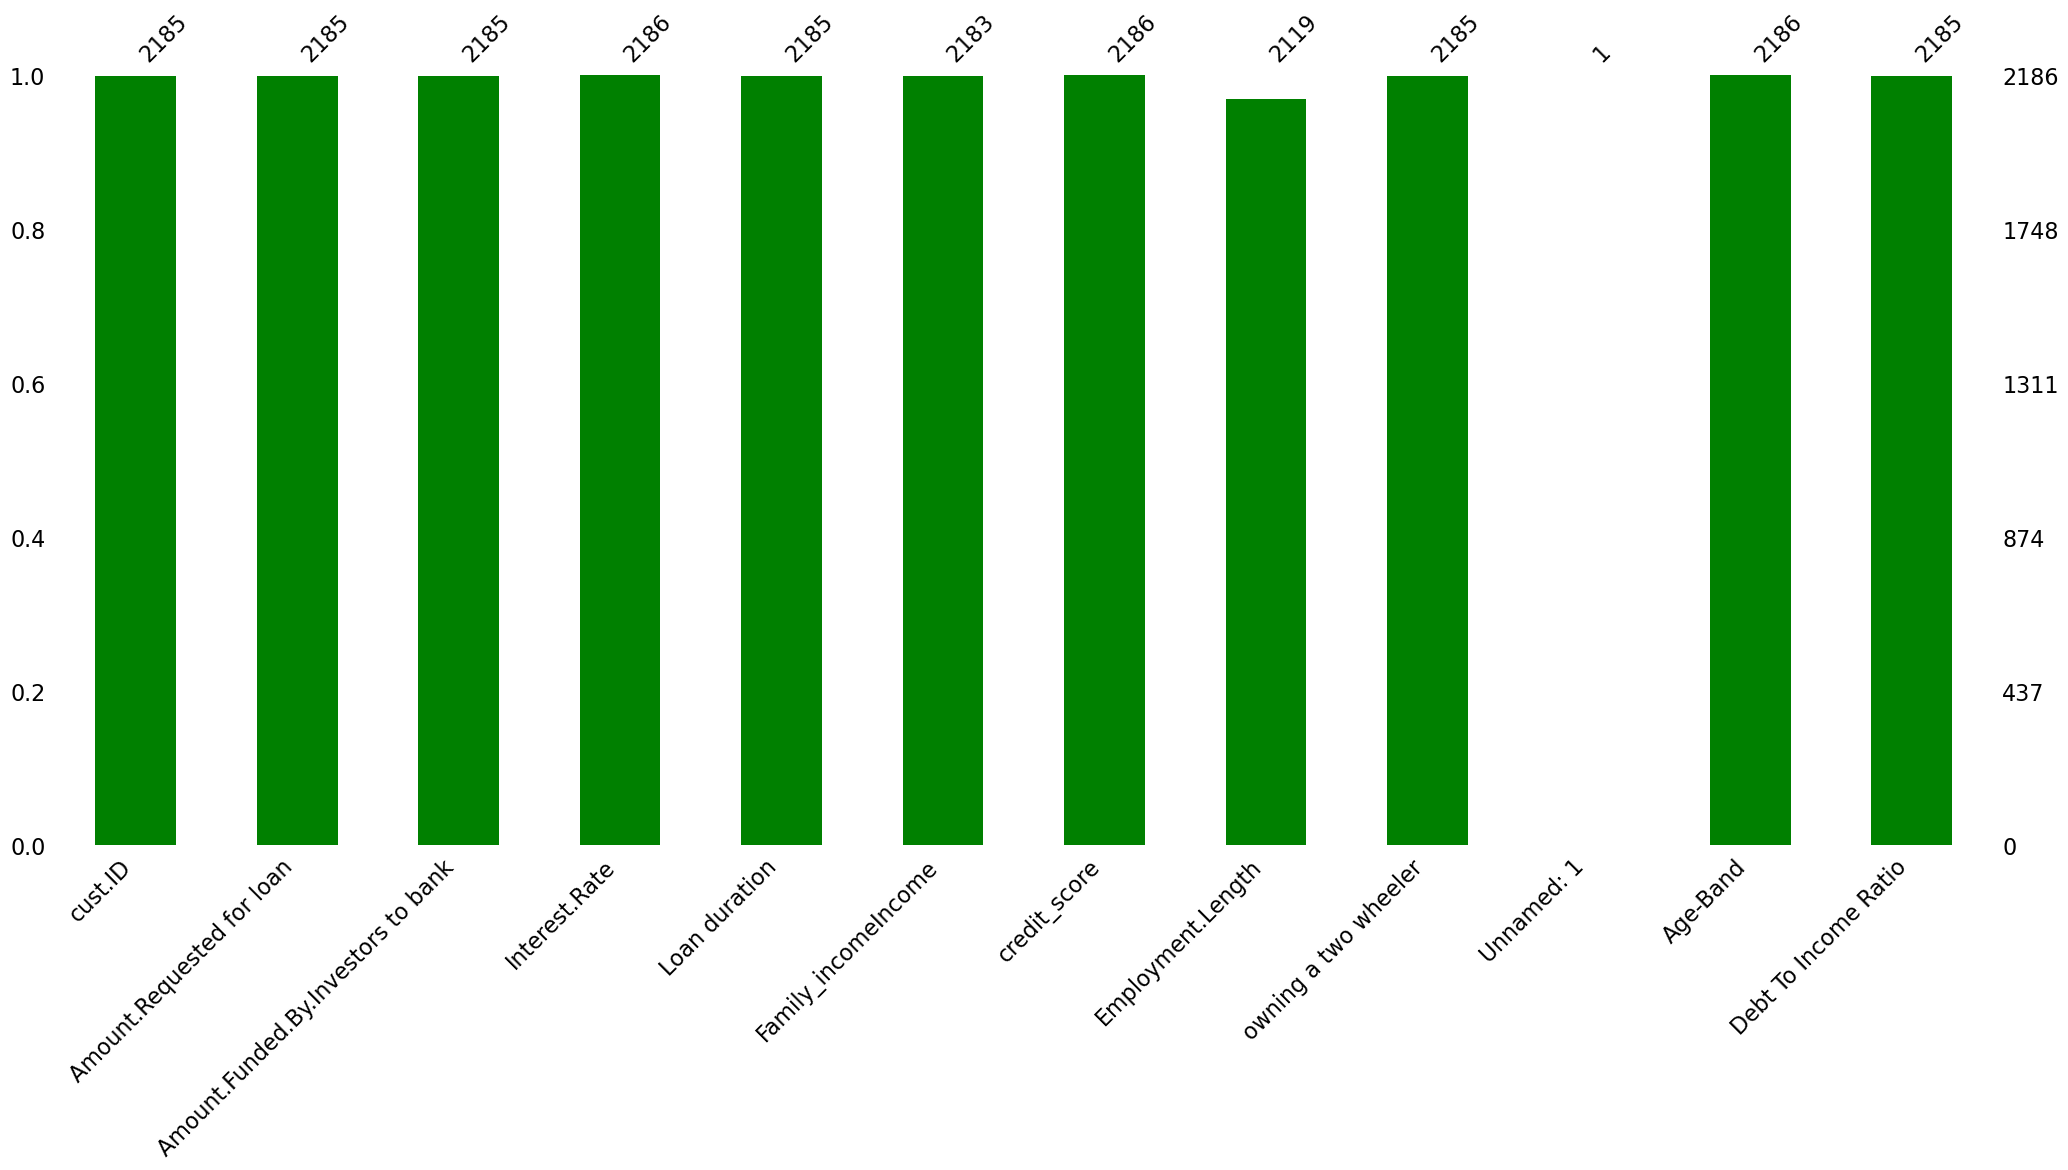

In [18]:
ms.bar(df,color='g')
plt.show()

Drop Unnamed:1 columns as it consist of all empty values, except one. Thus, we cannot use imputation as it will create bias in the column so we'll drop it.

In [19]:
df.drop(['Unnamed: 1'],axis=1,inplace=True)

In [20]:
df.head()

,cust.ID,Amount.Requested for loan,Amount.Funded.By.Investors to bank,Interest.Rate,Loan duration,Family_incomeIncome,credit_score,Employment.Length,owning a two wheeler,Age-Band,Debt To Income Ratio
0,84563.0,8000,8000,7.62#,36 months,3500,765-769,NaN,yes,25-39,0!
1,78765.0,9000,9000,10.16#,36 months,5166.67,710-714,10 + years,no,25-40,13.76!
2,24590.0,13000,12975,9.99#,60 months,10500,800-804,10+ years,yes,25-41,8.77!
3,9061.0,10000,10000,14.22#,36 months,2541.67,680-684,8 years,no,25-42,12.24!
4,47011.0,3600,3600,13.67#,36 months,5113,690-694,NaN,yes,25-43,16.41!


### Data Cleaning

- Interest.Rate - remove #
- Debt.To.Income.Ratio- remove !
- 'cust.ID ','Amount.Requested for loan', 'Amount.Funded.By.Investors to bank','Interest.Rate','Family_incomeIncome': Convert to numeric
- 'Employment.Length': Convert to numeric ( remove year, years,<,etc.)
- 'owning a two wheeler': Clean it by replacing yess !, noo with yes and no
- 'credit_score':  First replace all string characters with "" and then DIVIDE into two then take average and make it as single column as it is given as range
- 'age-band': First replace empty age-band value with mode of age-band as it is categorical data then  DIVIDE into two then take average and make it as single column as it is given as range
- 'owning a two wheeler', 'Loan duration': Create dummies

In [21]:
for col in ['Interest.Rate']:
    df[col]=df[col].str.replace('#',"")

In [22]:
df

,cust.ID,Amount.Requested for loan,Amount.Funded.By.Investors to bank,Interest.Rate,Loan duration,Family_incomeIncome,credit_score,Employment.Length,owning a two wheeler,Age-Band,Debt To Income Ratio
0,84563.0,8000,8000,7.62,36 months,3500,765-769,NaN,yes,25-39,0!
1,78765.0,9000,9000,10.16,36 months,5166.67,710-714,10 + years,no,25-40,13.76!
2,24590.0,13000,12975,9.99,60 months,10500,800-804,10+ years,yes,25-41,8.77!
3,9061.0,10000,10000,14.22,36 months,2541.67,680-684,8 years,no,25-42,12.24!
4,47011.0,3600,3600,13.67,36 months,5113,690-694,NaN,yes,25-43,16.41!
...,...,...,...,...,...,...,...,...,...,...,...
2181,101795.0,10000,550,10.59,36 months,2083.33,685-689,< 1 year,no,45-55,10.22!
2182,84805.0,13225,13225,15.31,36 months,5833.33,680-684,10+ years,yes,45-55,27.07!
2183,101548.0,10000,525,14.7,36 months,5416.67,645-649,< 1 year,no,45-55,6.37!
2184,3209.0,12000,11725,9.63,36 months,3000,750-754,< 1 year,yes,45-55,15!


In [23]:
df['Debt To Income Ratio']=df['Debt To Income Ratio'].str.replace('!','')

In [24]:
for col in ['Amount.Requested for loan', 'Amount.Funded.By.Investors to bank','Interest.Rate','Family_incomeIncome','Debt To Income Ratio']:
    df[col]=pd.to_numeric(df[col],errors='coerce')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [25]:
df.dtypes

cust.ID                               float64
Amount.Requested for loan             float64
Amount.Funded.By.Investors to bank    float64
Interest.Rate                         float64
Loan duration                          object
Family_incomeIncome                   float64
credit_score                           object
Employment.Length                      object
owning a two wheeler                   object
Age-Band                               object
Debt To Income Ratio                  float64
dtype: object

In [26]:
df['Employment.Length'].value_counts().to_frame()

,count
Employment.Length,
10+ years,571
< 1 year,227
2 years,214
3 years,203
5 years,179
4 years,160
1 year,159
6 years,132
7 years,108


In [27]:
df['Employment.Length']=df['Employment.Length'].str.replace("year's",'')
df['Employment.Length']=df['Employment.Length'].str.replace('yearss','')
df['Employment.Length']=df['Employment.Length'].str.replace('years','')
df['Employment.Length']=df['Employment.Length'].str.replace('year','')
df['Employment.Length']=np.where(df['Employment.Length'].str[:2]=='10',10,df['Employment.Length'])
df['Employment.Length']=np.where(df['Employment.Length'].str[:1]=='9',9,df['Employment.Length'])
df['Employment.Length']=np.where(df['Employment.Length'].str[:1]=='5',5,df['Employment.Length'])
df['Employment.Length']=np.where(df['Employment.Length'].str[0]=='<',0.5,df['Employment.Length'])   ## <1 year= mean(0+1)/2=0.5
df['Employment.Length']=np.where(df['Employment.Length'].str[0]=='.',10,df['Employment.Length'])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [28]:
df['Employment.Length'].value_counts().to_frame()

,count
Employment.Length,
10,573
0.5,227
2,214
3,203
5,180
4,160
1,159
6,133
7,109


In [29]:
for col in ['Employment.Length']:
    df[col]=pd.to_numeric(df[col],errors='coerce')

<IPython.core.display.Javascript object>

In [30]:
df.dtypes

cust.ID                               float64
Amount.Requested for loan             float64
Amount.Funded.By.Investors to bank    float64
Interest.Rate                         float64
Loan duration                          object
Family_incomeIncome                   float64
credit_score                           object
Employment.Length                     float64
owning a two wheeler                   object
Age-Band                               object
Debt To Income Ratio                  float64
dtype: object

In [31]:
df['owning a two wheeler'].value_counts().to_frame()

,count
owning a two wheeler,
yes,1091
no,1091
!,1
yes !,1
noo,1


In [32]:
df['owning a two wheeler'].unique()

array(['yes ', 'no', nan, '!', 'yes !', 'noo'], dtype=object)

In [33]:
df['owning a two wheeler']=df['owning a two wheeler'].str.replace('yes !','yes ')
df['owning a two wheeler']=df['owning a two wheeler'].str.replace('noo','no')
df['owning a two wheeler']=df['owning a two wheeler'].str.replace('!','yes ')

In [34]:
df['owning a two wheeler'].value_counts().to_frame()

,count
owning a two wheeler,
yes,1093
no,1092


In [35]:
df['credit_score'].value_counts()

credit_score
670-674      150
675-679      142
680-684      141
695-699      138
665-669      128
690-694      126
705-709      117
685-689      116
700-704      114
660-664      106
720-724      106
710-714       99
730-734       83
725-729       77
715-719       73
750-754       54
735-739       53
745-749       51
740-744       44
760-764       40
755-759       37
765-769       33
780-784       27
775-779       19
790-794       18
770-774       16
785-789       16
800-804       13
795-799       12
805-809        9
810-814        7
815-819        6
640-644        5
645-649        3
655-659        3
820-824        1
725-729 !      1
830-834        1
650-654        1
Name: count, dtype: int64

In [36]:
df['credit_score']=df['credit_score'].str.replace('!','')

In [37]:
k=df['credit_score'].str.split('-',expand=True).astype(float)
df['credit_s']=0.5*(k[0]+k[1])
del df['credit_score']

In [38]:
df

,cust.ID,Amount.Requested for loan,Amount.Funded.By.Investors to bank,Interest.Rate,Loan duration,Family_incomeIncome,Employment.Length,owning a two wheeler,Age-Band,Debt To Income Ratio,credit_s
0,84563.0,8000.0,8000.0,7.62,36 months,3500.00,NaN,yes,25-39,0.00,767.0
1,78765.0,9000.0,9000.0,10.16,36 months,5166.67,10.0,no,25-40,13.76,712.0
2,24590.0,13000.0,12975.0,9.99,60 months,10500.00,10.0,yes,25-41,8.77,802.0
3,9061.0,10000.0,10000.0,14.22,36 months,2541.67,8.0,no,25-42,12.24,682.0
4,47011.0,3600.0,3600.0,13.67,36 months,5113.00,NaN,yes,25-43,16.41,692.0
...,...,...,...,...,...,...,...,...,...,...,...
2181,101795.0,10000.0,550.0,10.59,36 months,2083.33,0.5,no,45-55,10.22,687.0
2182,84805.0,13225.0,13225.0,15.31,36 months,5833.33,10.0,yes,45-55,27.07,682.0
2183,101548.0,10000.0,525.0,14.70,36 months,5416.67,0.5,no,45-55,6.37,647.0
2184,3209.0,12000.0,11725.0,9.63,36 months,3000.00,0.5,yes,45-55,15.00,752.0


In [39]:
df['Age-Band'].value_counts()

Age-Band
35-45      892
30-40      660
45-55      622
             3
25-39        1
25-40        1
25-41        1
25-42        1
25-43        1
25-44        1
25-45        1
!35-45       1
"45          1
Name: count, dtype: int64

In [40]:
df['Age-Band'].mode()

0    35-45
Name: Age-Band, dtype: object

In [41]:
df['Age-Band']=df['Age-Band'].str.replace('!','')
df['Age-Band']=df['Age-Band'].str.replace('"','')
df['Age-Band']=np.where(df['Age-Band'].str[:]=='',df['Age-Band'].mode(),df['Age-Band'])

<IPython.core.display.Javascript object>

In [42]:
df['Age-Band'].value_counts()

Age-Band
35-45     895
30-40     660
45-55     622
25-39       1
25-40       1
25-41       1
25-42       1
25-43       1
25-44       1
25-45       1
35-45       1
45          1
Name: count, dtype: int64

In [43]:
m=df['Age-Band'].str.split('-',expand=True).astype(float)
df['age']=0.5*(m[0]+m[1])
del df['Age-Band']

In [44]:
df.head()

,cust.ID,Amount.Requested for loan,Amount.Funded.By.Investors to bank,Interest.Rate,Loan duration,Family_incomeIncome,Employment.Length,owning a two wheeler,Debt To Income Ratio,credit_s,age
0,84563.0,8000.0,8000.0,7.62,36 months,3500.00,NaN,yes,0.00,767.0,32.0
1,78765.0,9000.0,9000.0,10.16,36 months,5166.67,10.0,no,13.76,712.0,32.5
2,24590.0,13000.0,12975.0,9.99,60 months,10500.00,10.0,yes,8.77,802.0,33.0
3,9061.0,10000.0,10000.0,14.22,36 months,2541.67,8.0,no,12.24,682.0,33.5
4,47011.0,3600.0,3600.0,13.67,36 months,5113.00,NaN,yes,16.41,692.0,34.0


In [45]:
df['Loan duration'].value_counts()

Loan duration
36 months       1716
60 months        467
.                  1
>= 36 months       1
Name: count, dtype: int64

In [46]:
df['Loan duration']=df['Loan duration'].str.replace('months','')
df['Loan duration']=np.where(df['Loan duration'].str[0]=='>','60 ',df['Loan duration'])
df['Loan duration']=np.where(df['Loan duration'].str[0]=='.','36 ',df['Loan duration'])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [47]:
df['Loan duration'].value_counts()

Loan duration
36     1717
60      468
Name: count, dtype: int64

In [48]:
df.dtypes

cust.ID                               float64
Amount.Requested for loan             float64
Amount.Funded.By.Investors to bank    float64
Interest.Rate                         float64
Loan duration                          object
Family_incomeIncome                   float64
Employment.Length                     float64
owning a two wheeler                   object
Debt To Income Ratio                  float64
credit_s                              float64
age                                   float64
dtype: object

### Missing Value Treatment

In [49]:
Total = df.isnull().sum().sort_values(ascending=False)          

Percent = (df.isnull().sum()*100/df.isnull().count()).sort_values(ascending=False)   

missing_data = pd.concat([Total, Percent], axis=1, keys=['Total', 'Percentage of Missing Values'])    
missing_data

<IPython.core.display.Javascript object>

,Total,Percentage of Missing Values
Employment.Length,67,3.064959
Amount.Funded.By.Investors to bank,9,0.411711
Family_incomeIncome,9,0.411711
Amount.Requested for loan,5,0.228728
Debt To Income Ratio,2,0.091491
cust.ID,1,0.045746
Loan duration,1,0.045746
owning a two wheeler,1,0.045746
age,1,0.045746
Interest.Rate,0,0.000000


In [50]:
df['Amount.Requested for loan'].fillna(df['Amount.Requested for loan'].mean(),inplace=True)
df['Amount.Funded.By.Investors to bank'].fillna(df['Amount.Funded.By.Investors to bank'].mean(),inplace=True)
df['Family_incomeIncome'].fillna(df['Family_incomeIncome'].mean(),inplace=True)
df['Debt To Income Ratio'].fillna(df['Debt To Income Ratio'].mean(),inplace=True)
df['age'].fillna(df['age'].mean(),inplace=True)
df['Employment.Length'].fillna(df['Employment.Length'].mode()[0],inplace=True)
df['Loan duration'].fillna(df['Loan duration'].mode()[0],inplace=True)

In [51]:
df['owning a two wheeler'].fillna(df['owning a two wheeler'].mode()[0],inplace=True)

In [52]:
df.dropna(subset=['cust.ID'],inplace=True)

In [53]:
df.isnull().sum()

cust.ID                               0
Amount.Requested for loan             0
Amount.Funded.By.Investors to bank    0
Interest.Rate                         0
Loan duration                         0
Family_incomeIncome                   0
Employment.Length                     0
owning a two wheeler                  0
Debt To Income Ratio                  0
credit_s                              0
age                                   0
dtype: int64

<IPython.core.display.Javascript object>

<Axes: xlabel='Loan duration', ylabel='count'>

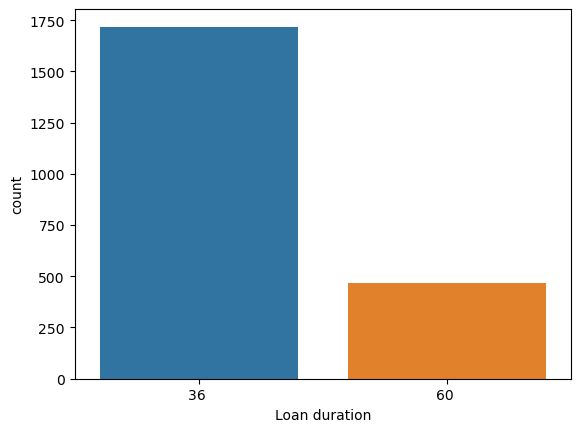

In [54]:
sns.countplot(x='Loan duration',data=df)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

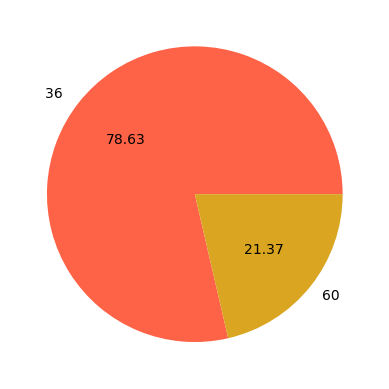

In [55]:
file=df['Loan duration'].value_counts()
custom_colors=['#FF6347','#DAA520']
plt.pie(file,labels=file.index,autopct='%.2f',colors=custom_colors)
plt.show()

<IPython.core.display.Javascript object>

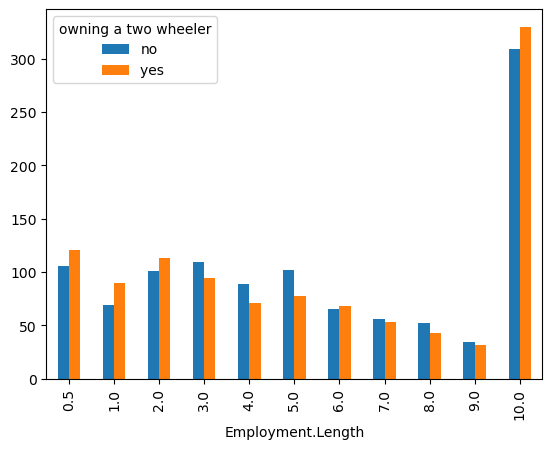

In [56]:
bar=pd.crosstab(df['Employment.Length'],df['owning a two wheeler']).plot(kind='bar')

**Insights:**
- Employment Length Impact: As employment length increases, the number of individuals owning a two-wheeler tends to rise significantly, especially at the highest employment length (10.0 years).
- Lower Employment Length: For shorter employment lengths (0.5 to 3.0 years), the ownership of two-wheelers is relatively lower compared to longer employment lengths.
- Trend Observation: There appears to be a positive correlation between employment length and two-wheeler ownership, suggesting that individuals with longer employment durations are more likely to own a two-wheeler.
- Potential Implications: This trend could indicate that financial stability or increased income associated with longer employment may lead to higher rates of two-wheeler ownership.

Overall, the data suggests that employment length is a significant factor in determining two-wheeler ownership.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

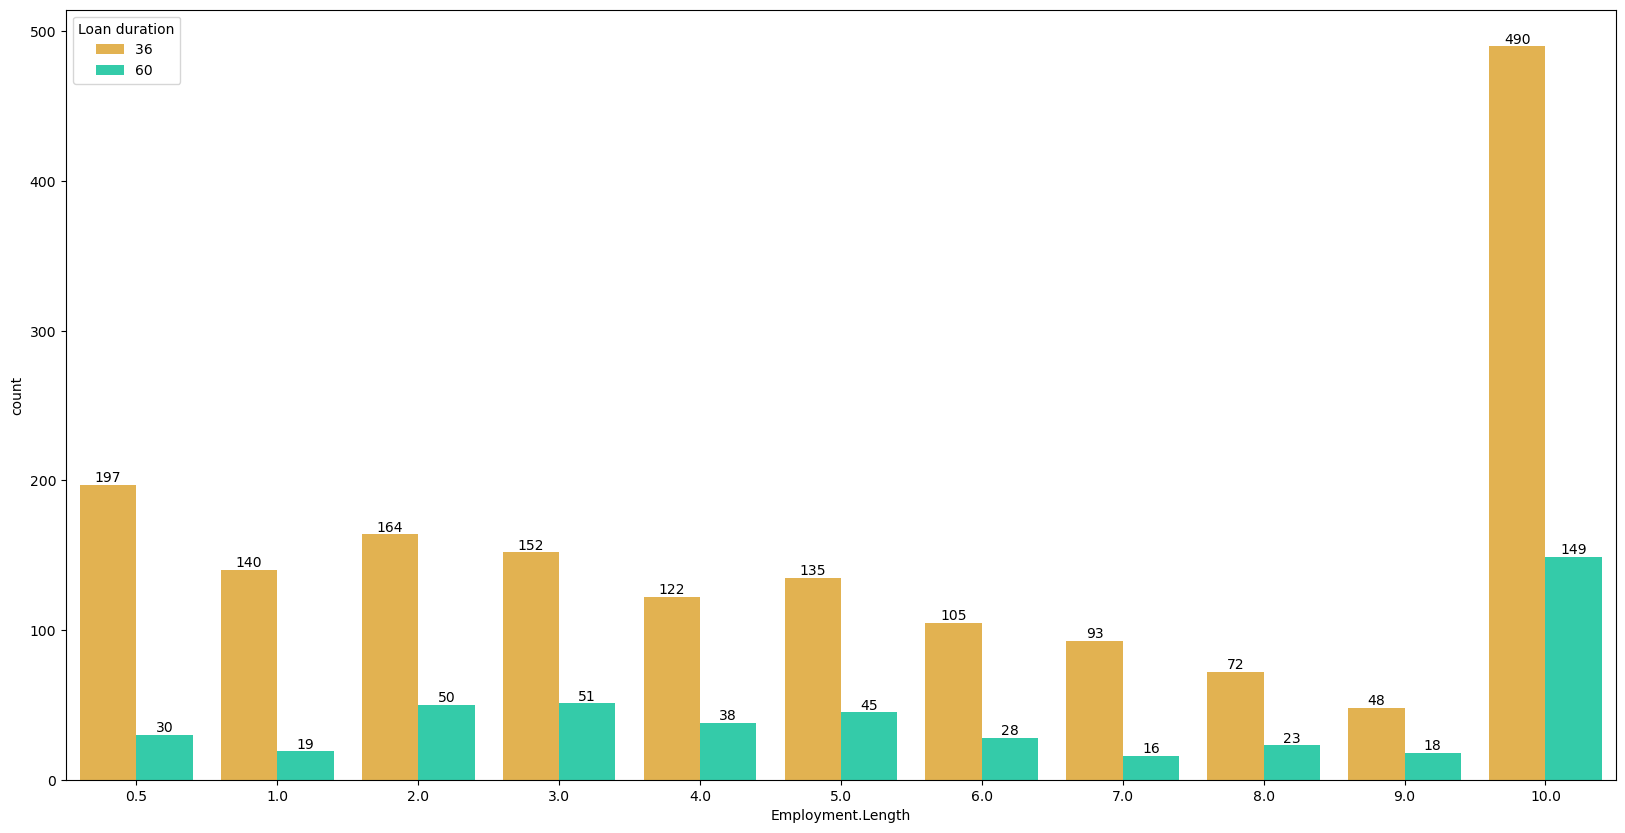

In [57]:
plt.figure(figsize=(20,10))
bar=sns.countplot(x='Employment.Length',data=df,hue='Loan duration',palette='turbo_r')
for container in bar.containers:
    bar.bar_label(container)
plt.show()

**Insight:**
- For shorter employment lengths (0.5 to 3.0 years), the count of loans is relatively low, particularly for the 6o month duration. As employment length increases, the count of loans for both durations generally increases, with a notable spike at 10.0 years, particularly for the 36 month loan duration, indicating a strong preference or ability to secure loans among those with longer employment.
- The 36 month loan duration consistently has higher counts across most employment lengths compared to the 60 month duration. This suggests that borrowers may prefer shorter loan durations, possibly due to lower interest rates or quicker repayment terms.

Implications for Lenders: Lenders might consider employment length as a significant factor when assessing loan applications, as it appears to correlate with loan duration preferences and overall loan counts.

<IPython.core.display.Javascript object>

<Axes: xlabel='Family_incomeIncome', ylabel='Amount.Requested for loan'>

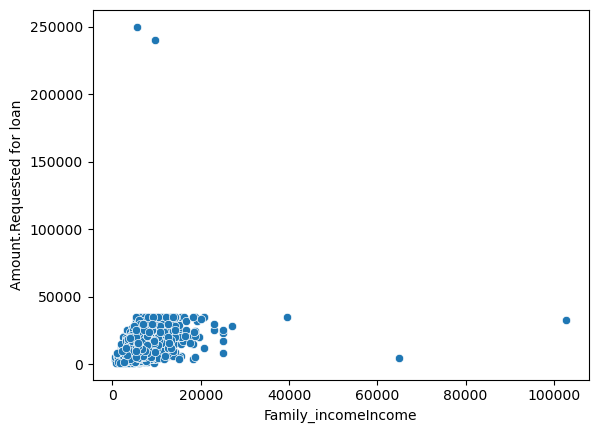

In [58]:
sns.scatterplot(y=df['Amount.Requested for loan'],x=df['Family_incomeIncome'])

**Insight:**
- Data Distribution: Most data points are clustered at lower family income levels (around 0 to 20,000), with a corresponding low amount requested for loans. This suggests that individuals with lower incomes are primarily seeking smaller loan amounts.
- Outliers: There are a few outliers on the higher end of the loan amount requested that do not correspond to similarly high family income levels. This indicates that some individuals may be requesting significantly larger loans despite having relatively low family incomes.
- Correlation Observation: There appears to be a weak positive correlation between family income and the amount requested for a loan. As family income increases, the amount requested tends to increase, but the relationship is not strong, as evidenced by the spread of points.
- Loan Request Behavior: The majority of loan requests come from individuals with lower family incomes, which may suggest that these individuals are seeking financial assistance for essential needs.

Implications for Lenders: Lenders may need to consider the income levels of applicants when evaluating loan requests, especially given the presence of outliers that could skew average loan amounts.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

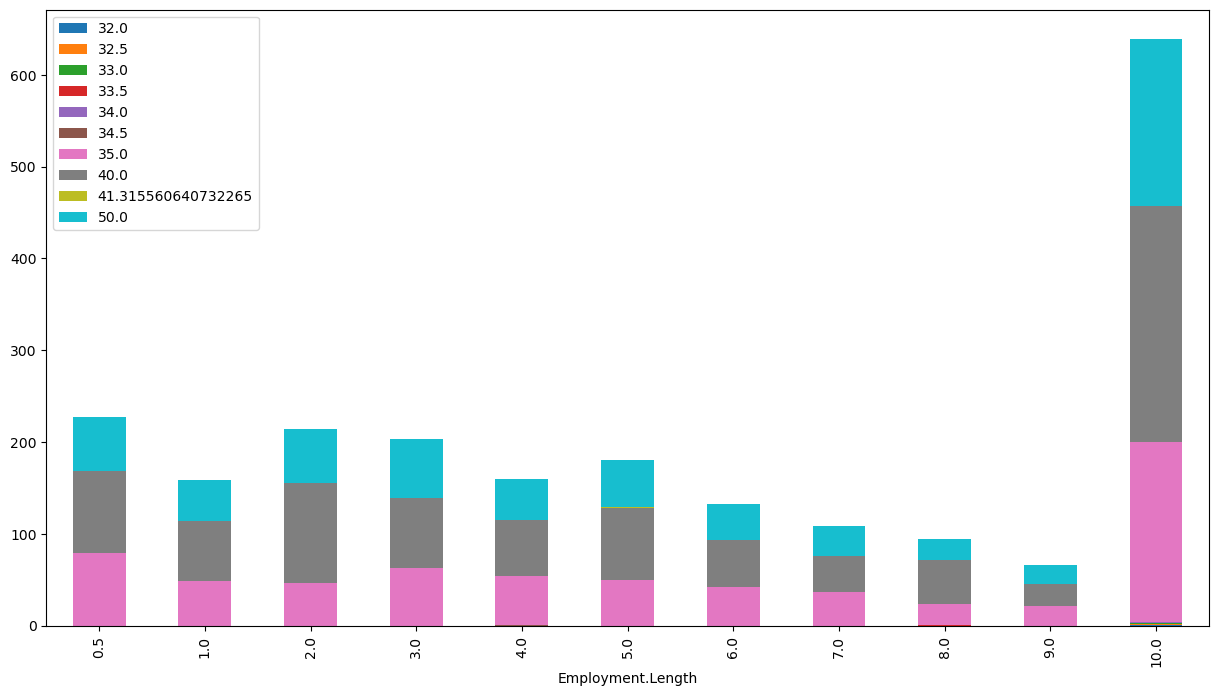

In [59]:
plt.rcParams['figure.figsize'] = (15, 8)
loc_plt=pd.crosstab(df['Employment.Length'],df['age'])
loc_plt.plot(kind='bar',stacked=True)
plt.legend()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

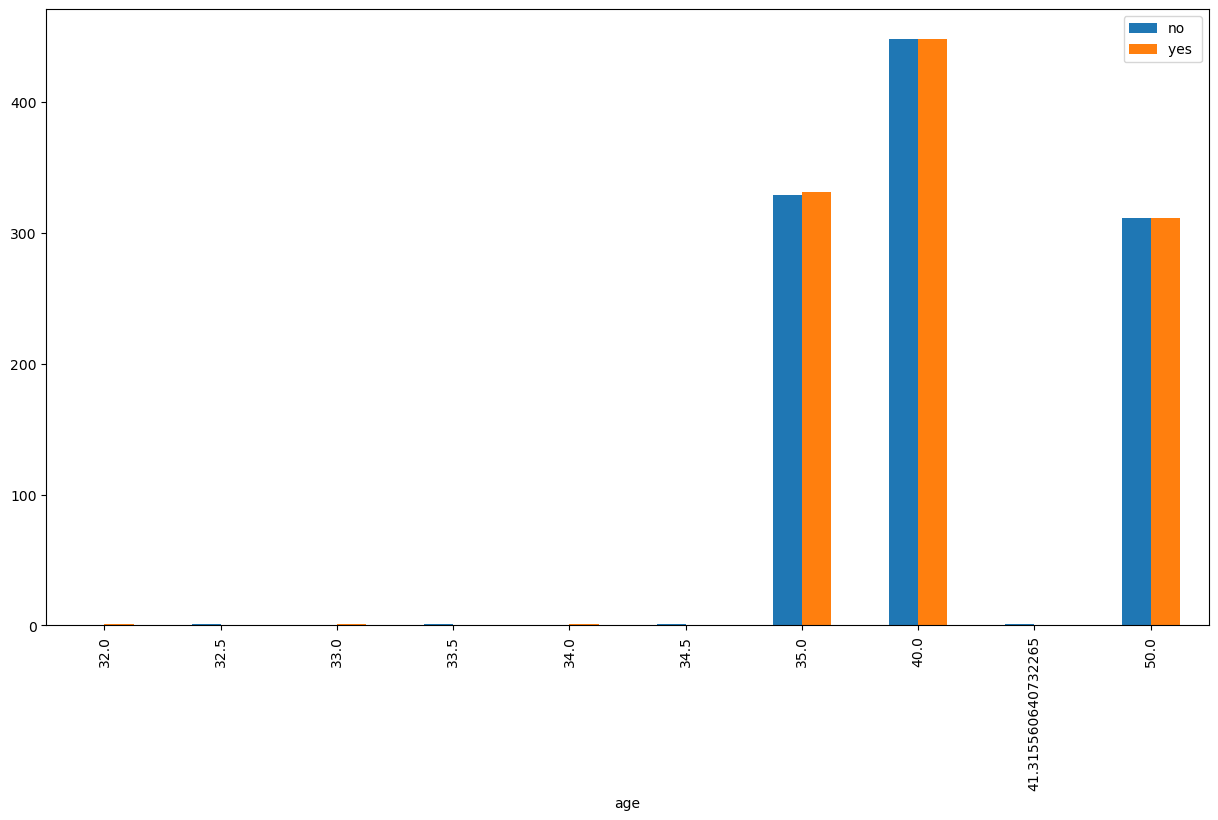

In [60]:
plt.rcParams['figure.figsize'] = (15, 8)
loc_plt=pd.crosstab(df['age'],df['owning a two wheeler'])
loc_plt.plot(kind='bar')
plt.legend()

**Insight:**
- Age Distribution:
The histogram shows that the majority of loan applicants are concentrated around the ages of 35 to 40. This suggests that this age group is the most active in seeking loans.
- Loan Approval Status:
The blue bars represent loan denials (no), while the orange bars represent approval (yes).
There is a noticeable trend where loan approvals are significantly higher than denials across most age groups, particularly for those aged 35 to 40.
- Age Group Insights:
The age group of 40 shows the highest number of approvals, indicating that older applicants may have a better chance of securing loans, possibly due to more stable financial situations or credit histories.
The lower frequency of loan requests from younger age groups (e.g., 32 to 34) suggests that these individuals may either be less likely to apply for loans or may not meet the criteria for approval.

Implications for Lenders:
Lenders may want to focus their marketing efforts on the 35 to 40 age demographic, as this group shows the highest engagement with loan products.
Understanding the characteristics of approved applicants in this age range could help lenders refine their criteria and offerings.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

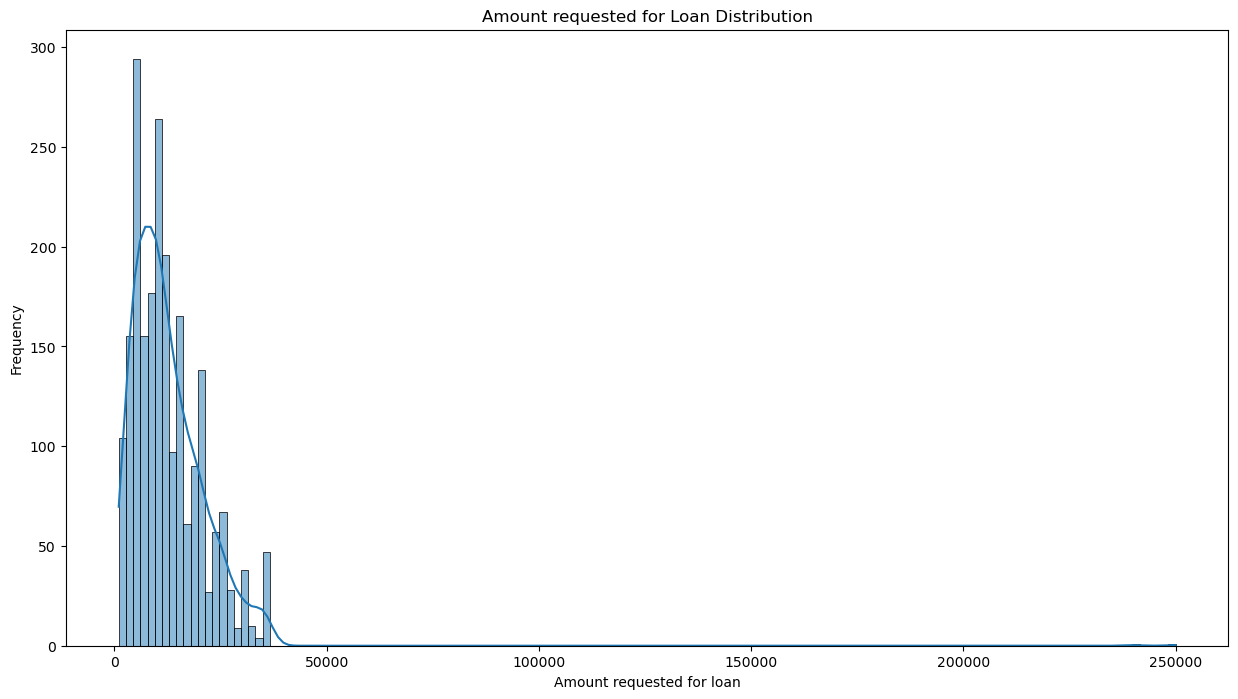

In [75]:
sns.histplot(data=df,x='Amount.Requested for loan',kde=True)
plt.title('Amount requested for Loan Distribution')
plt.xlabel('Amount requested for loan')
plt.ylabel('Frequency')
plt.show()

**Insight:**
- Distribution Shape:
The histogram shows a right-skewed distribution, indicating that most loan requests are for lower amounts, with fewer requests for higher amounts. This suggests that a significant number of borrowers are seeking smaller loans.
- Frequency of Loan Amounts:
The highest frequency of loan requests appears to be concentrated in the lower range, with a gradual decline in frequency as the loan amount increases. This trend indicates that smaller loans are more common among borrowers.
- Outliers:
There are a few instances of very high loan requests (above $200,000), which may represent outliers. These requests could be from borrowers seeking funding for larger projects or investments, but they are relatively rare compared to the overall distribution.

Implications for Lenders:
Lenders may want to focus their marketing and product offerings on smaller loan amounts, as this is where the majority of demand lies. Understanding this trend can help in designing loan products that cater to the needs of most borrowers.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

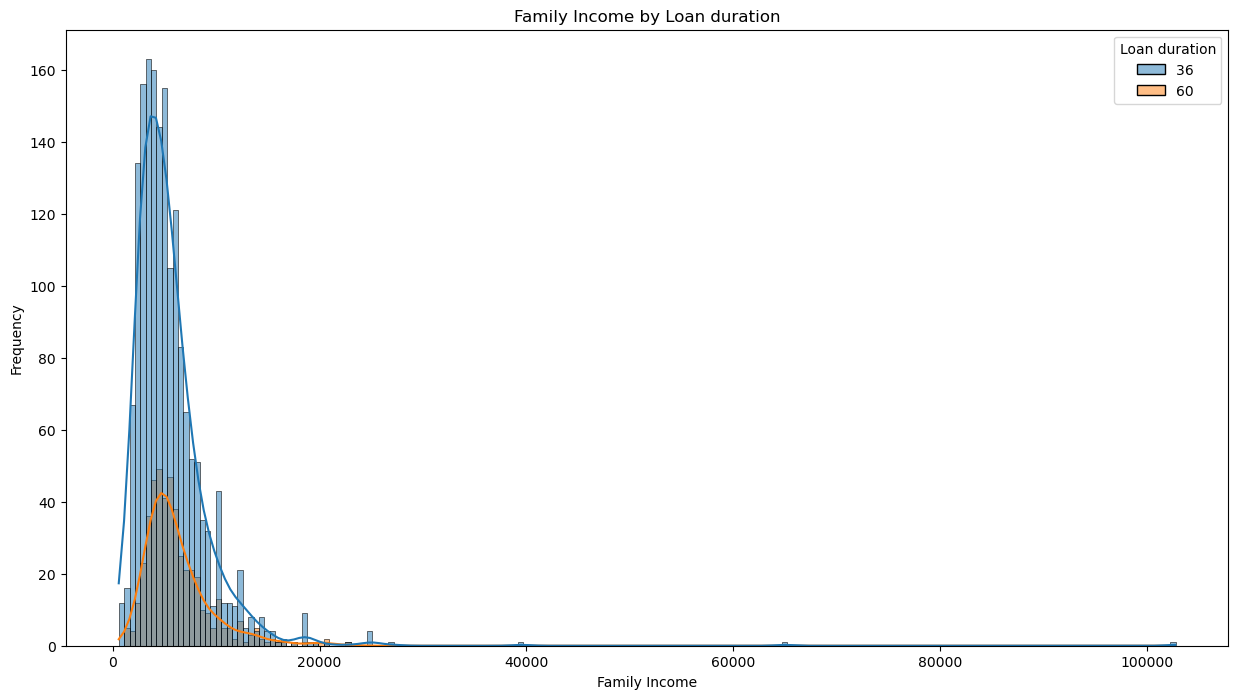

In [74]:
sns.histplot(data=df,x='Family_incomeIncome',hue='Loan duration',kde=True)
plt.title('Family Income by Loan duration')
plt.xlabel('Family Income')
plt.ylabel('Frequency')
plt.show()

**Insight:**
- Income Distribution:
The histogram shows a right-skewed distribution for family income, indicating that most families have lower incomes, with fewer families earning higher incomes. The majority of the data points cluster around the lower end of the income scale.
- Loan Duration Comparison:
The blue bars represent families with a 36-month loan duration, while the orange line indicates families with a 60-month loan duration.
Families with a 60-month loan duration tend to have a slightly higher frequency of higher income levels compared to those with a 36-month loan duration.
- Frequency of Loan Durations:
The 36-month loan duration shows a higher frequency of families with lower incomes, suggesting that shorter loan terms may be more common among lower-income families.
Conversely, families with a 60-month loan duration appear to be more evenly distributed across various income levels, indicating that longer loan terms may attract a broader range of income levels.

Implications for Lending:
Lenders may consider tailoring their loan products based on income levels. For instance, shorter loan durations might be more appealing to lower-income families, while longer durations could be marketed to families with higher incomes who may prefer lower monthly payments.

### Outlier treatment

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

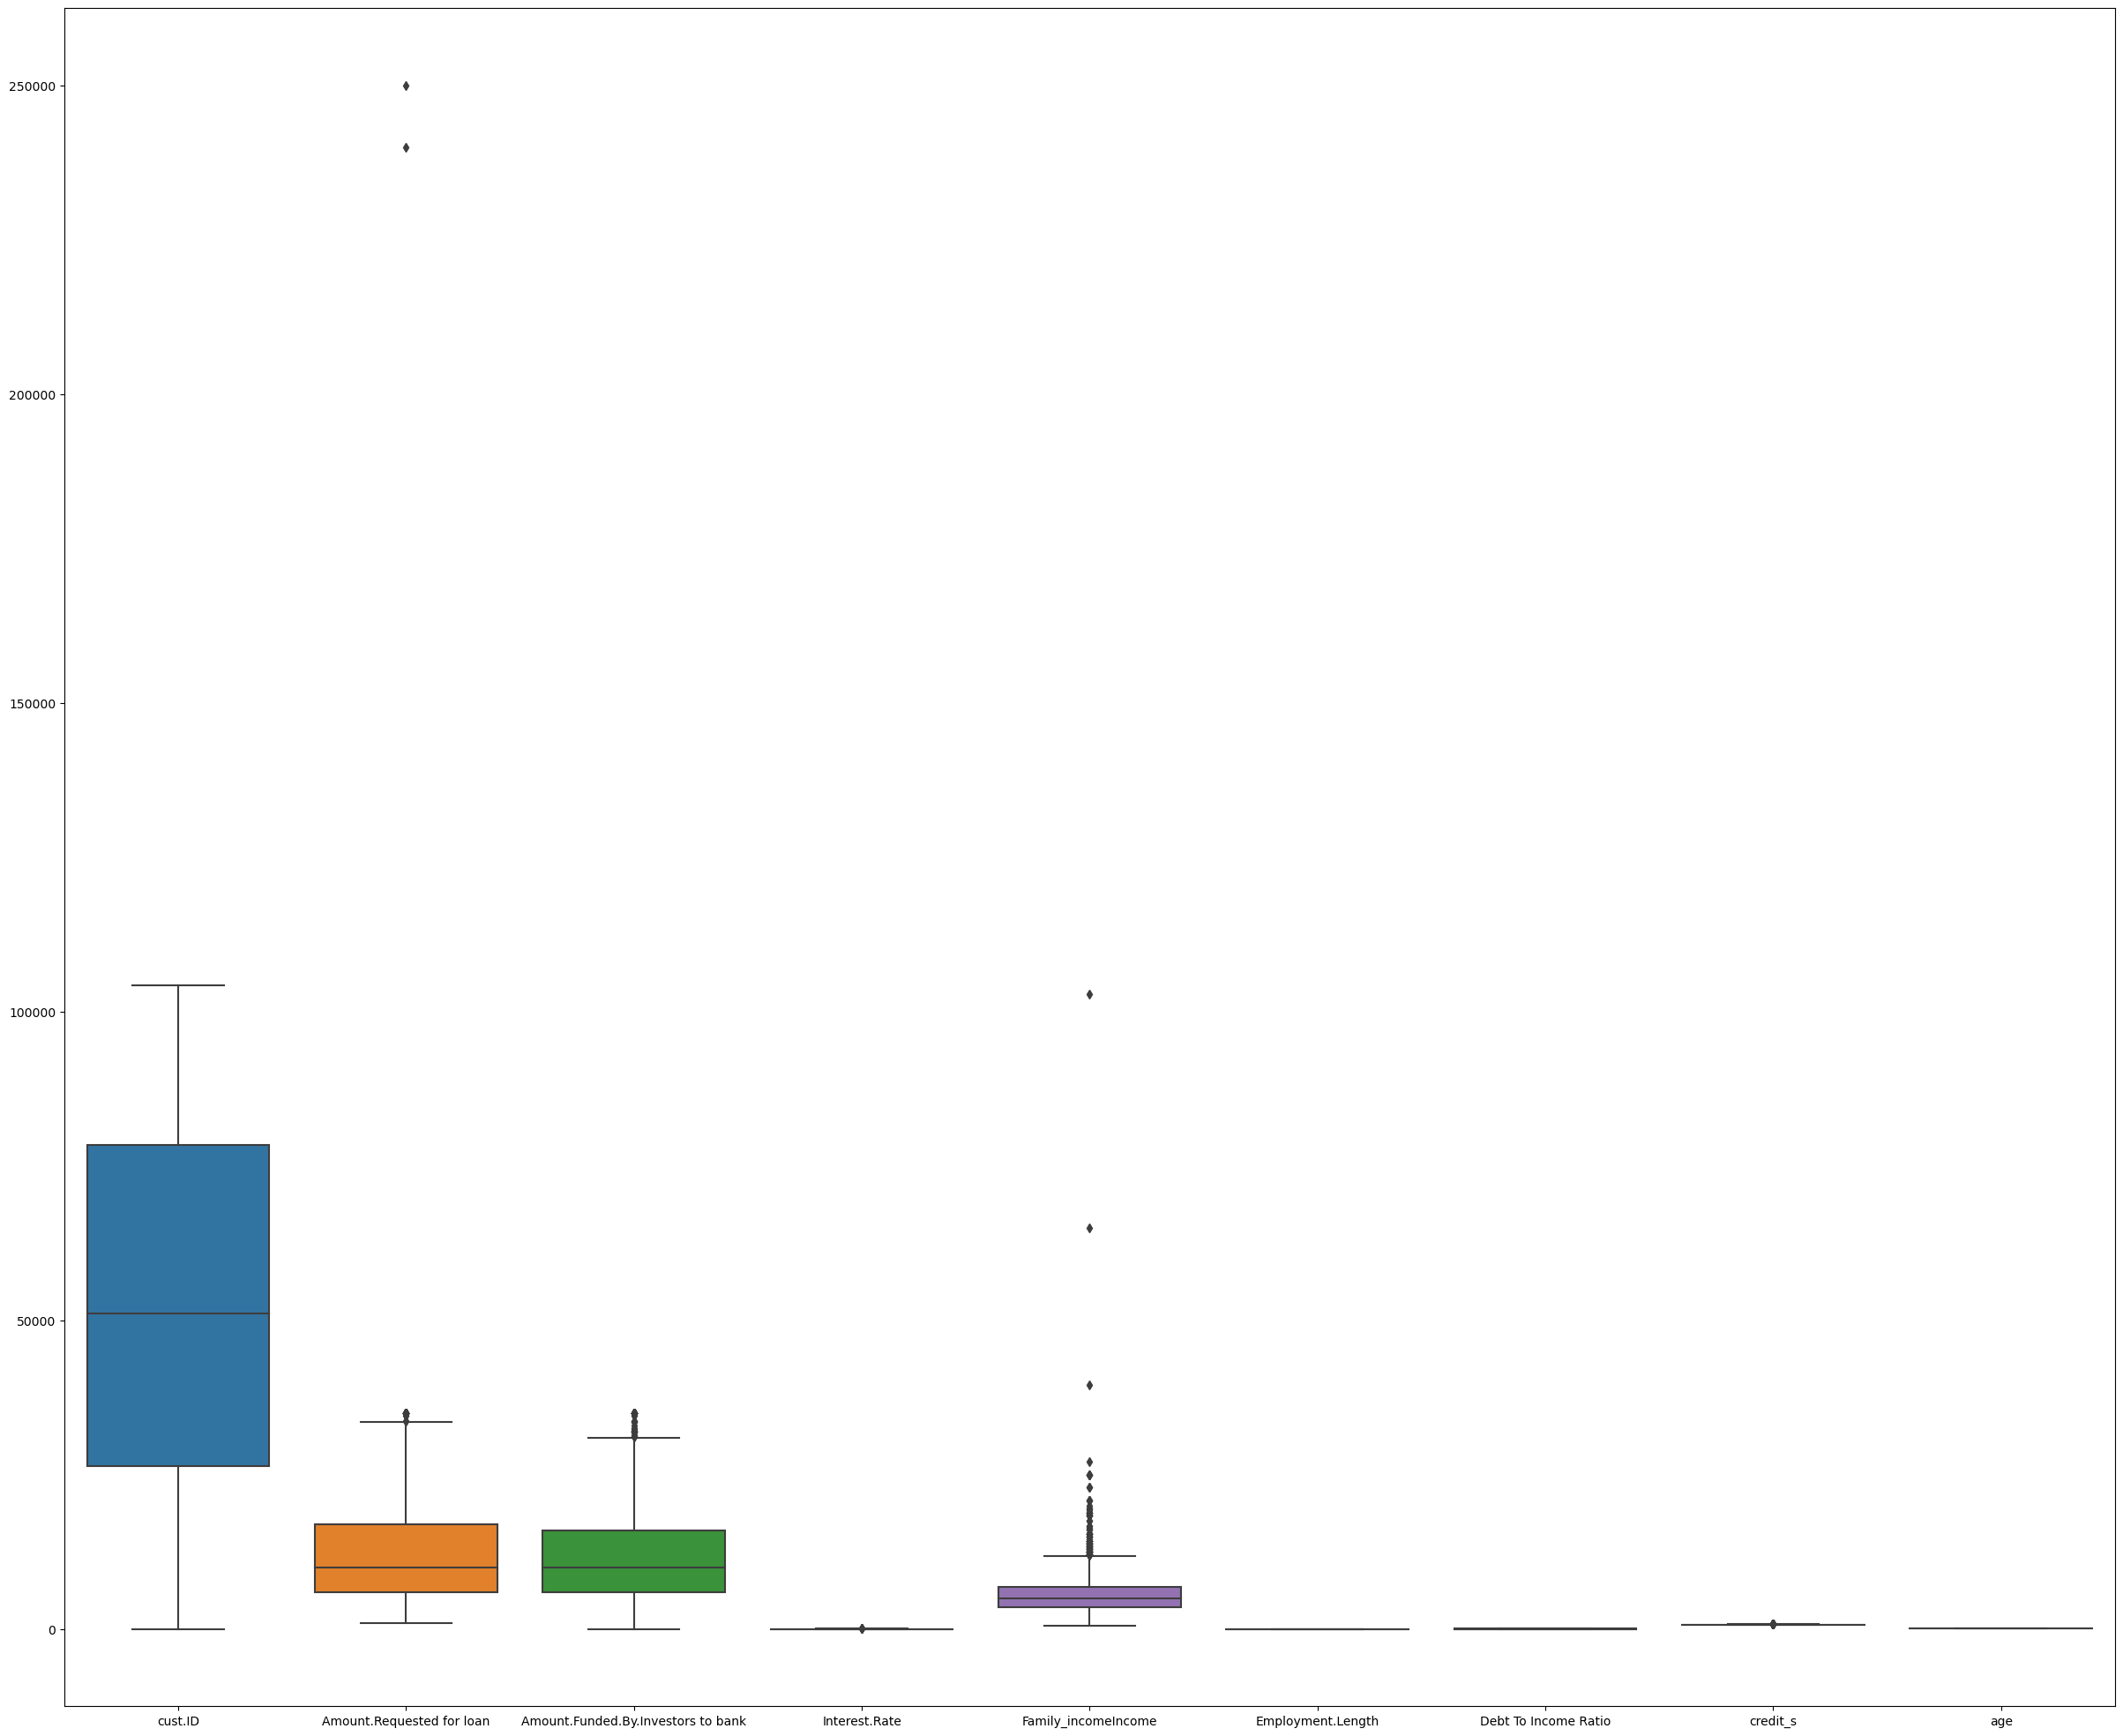

In [64]:
plt.figure(figsize=(30,25))
sns.boxplot(df)
plt.show()

<IPython.core.display.Javascript object>

<Axes: ylabel='Family_incomeIncome'>

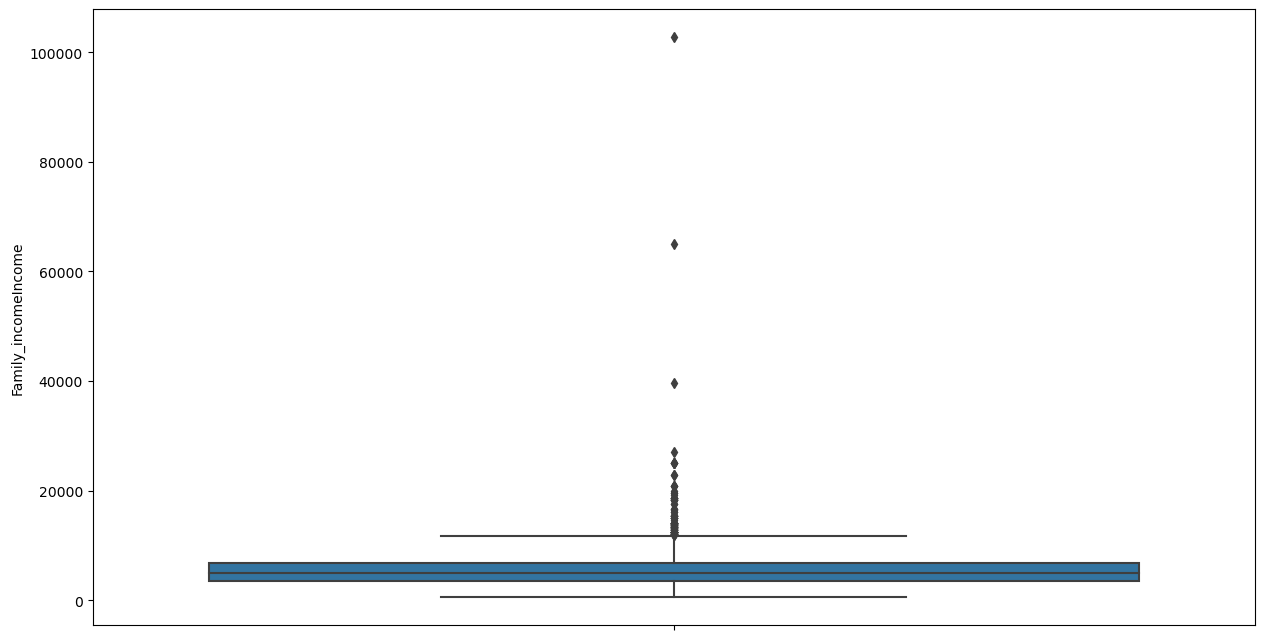

In [65]:
sns.boxplot(y='Family_incomeIncome', data=df)

<IPython.core.display.Javascript object>

<Axes: ylabel='Amount.Requested for loan'>

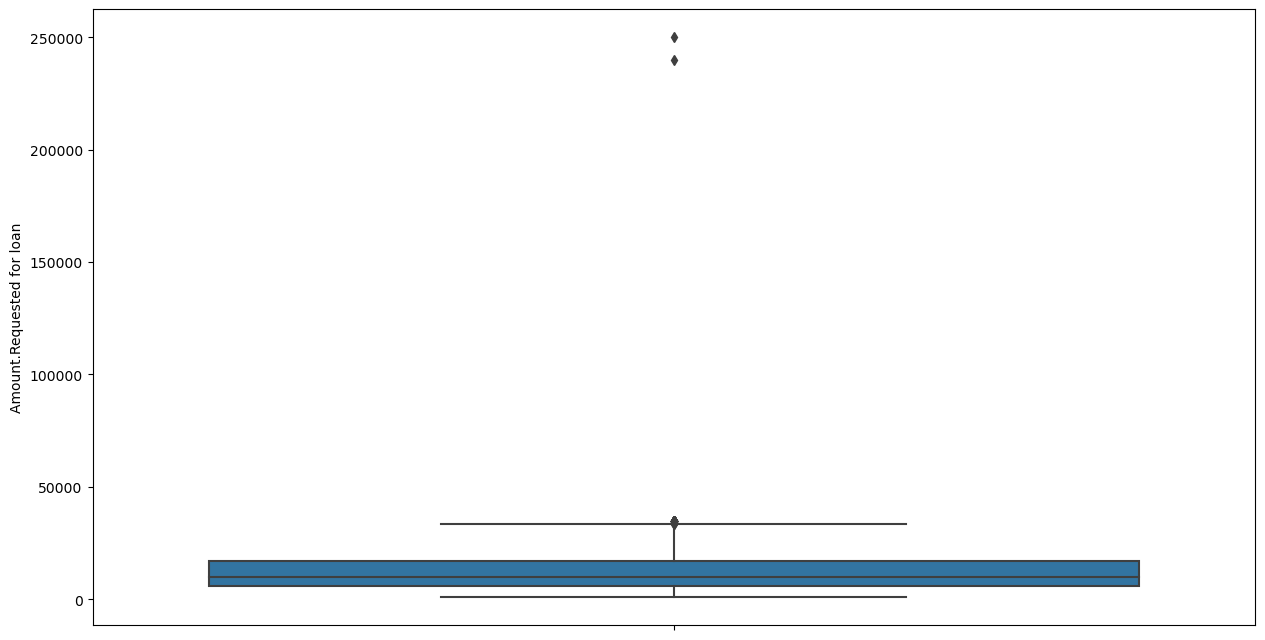

In [66]:
sns.boxplot(y='Amount.Requested for loan', data=df)

In [67]:
### Extracting outliers from 'Amount.Requested for loan'
Q1=df['Amount.Requested for loan'].quantile(0.25)
Q3=df['Amount.Requested for loan'].quantile(0.75)
IQR=Q3-Q1
print('Q1=',Q1)
print('Q3=',Q3)
print('IQR=',IQR)

Q1= 6000.0
Q3= 17000.0
IQR= 11000.0


In [68]:
UW=Q3+(1.5*IQR)
LW=Q1-(1.5*IQR)

print('Upper whisker=',UW)
print('Lower whisker=',LW)

Upper whisker= 33500.0
Lower whisker= -10500.0


In [69]:
otl= df[(df['Amount.Requested for loan']<LW) | (df['Amount.Requested for loan']>UW)]
otl

,cust.ID,Amount.Requested for loan,Amount.Funded.By.Investors to bank,Interest.Rate,Loan duration,Family_incomeIncome,Employment.Length,owning a two wheeler,Debt To Income Ratio,credit_s,age
25,13863.0,250000.0,20850.00,15.58,60,5666.67,10.0,no,0.60,787.0,35.0
29,18629.0,240000.0,24000.00,6.54,36,9583.33,3.0,no,5.62,757.0,35.0
89,65134.0,34500.0,34450.00,6.62,36,10000.00,9.0,no,16.46,807.0,35.0
113,75067.0,35000.0,35000.00,21.00,36,7702.00,10.0,no,11.05,672.0,35.0
173,80059.0,35000.0,35000.00,21.98,60,11500.00,2.0,no,23.81,692.0,35.0
181,91334.0,35000.0,35000.00,15.31,36,7500.00,1.0,no,19.59,697.0,35.0
226,24464.0,35000.0,24868.47,17.99,60,14000.00,10.0,yes,6.39,717.0,35.0
271,84897.0,35000.0,35000.00,20.49,36,12333.33,10.0,no,20.82,702.0,35.0
386,83869.0,35000.0,34950.00,8.90,36,9166.67,1.0,yes,20.46,737.0,35.0
387,30718.0,35000.0,33500.00,13.49,60,15583.33,6.0,no,10.63,762.0,35.0


In [70]:
otl.shape

(52, 11)

In [71]:
### Extracting outliers from 'Amount.Requested for loan'
Q1=df['Family_incomeIncome'].quantile(0.25)
Q3=df['Family_incomeIncome'].quantile(0.75)
IQR=Q3-Q1
print('Q1=',Q1)
print('Q3=',Q3)
print('IQR=',IQR)

Q1= 3448.33
Q3= 6833.33
IQR= 3385.0


In [72]:
UW=Q3+(1.5*IQR)
LW=Q1-(1.5*IQR)

print('Upper whisker=',UW)
print('Lower whisker=',LW)

Upper whisker= 11910.83
Lower whisker= -1629.17


In [73]:
otl= df[(df['Amount.Requested for loan']<LW) | (df['Amount.Requested for loan']>UW)]
otl

,cust.ID,Amount.Requested for loan,Amount.Funded.By.Investors to bank,Interest.Rate,Loan duration,Family_incomeIncome,Employment.Length,owning a two wheeler,Debt To Income Ratio,credit_s,age
2,24590.0,13000.0,12975.000000,9.99,60,10500.00,10.0,yes,8.77,802.0,33.0
6,29653.0,17000.0,16975.000000,11.99,60,4666.67,10.0,yes,12.69,747.0,35.0
7,100440.0,18825.0,12046.245893,21.00,60,4583.33,10.0,no,19.22,682.0,40.0
12,75012.0,15000.0,15000.000000,12.12,36,5000.00,10.0,yes,19.16,707.0,35.0
13,73179.0,29175.0,29175.000000,21.00,60,12500.00,4.0,no,8.83,697.0,35.0
...,...,...,...,...,...,...,...,...,...,...,...
2177,29595.0,30000.0,30000.000000,20.25,60,12500.00,5.0,no,10.46,697.0,50.0
2178,19133.0,12000.0,12000.000000,7.29,36,6250.00,2.0,yes,27.15,742.0,50.0
2182,84805.0,13225.0,13225.000000,15.31,36,5833.33,10.0,yes,27.07,682.0,50.0
2184,3209.0,12000.0,11725.000000,9.63,36,3000.00,0.5,yes,15.00,752.0,50.0


Since we only have 2000 rows thus, if we try to remove outliers from our data we will have to drop almost 50% of good values of data and imputing them will create bias in our data so we'll leave it as it is for now.

### One-hot encoding
One hot encoding is a technique that we use to represent categorical variables as numerical values in a machine learning model. The advantages of using one hot encoding include: It allows the use of categorical variables in models that require numerical input, which would otherwise be difficult to include due to their non numeric nature

In [403]:
cat=df.select_dtypes(include='O')

In [404]:
cat

,Loan duration,owning a two wheeler
0,36,yes
1,36,no
2,60,yes
3,36,no
4,36,yes
...,...,...
2181,36,no
2182,36,yes
2183,36,no
2184,36,yes


In [405]:
cat=pd.get_dummies(data=cat,drop_first=True).astype(int)

<IPython.core.display.Javascript object>

In [406]:
cat

,Loan duration_60,owning a two wheeler_yes
0,0,1
1,0,0
2,1,1
3,0,0
4,0,1
...,...,...
2181,0,0
2182,0,1
2183,0,0
2184,0,1


In [407]:
df.drop(['owning a two wheeler','Loan duration'],axis=1,inplace=True)
df

,cust.ID,Amount.Requested for loan,Amount.Funded.By.Investors to bank,Interest.Rate,Family_incomeIncome,Employment.Length,Debt To Income Ratio,credit_s,age
0,84563.0,8000.0,8000.0,7.62,3500.00,10.0,0.00,767.0,32.0
1,78765.0,9000.0,9000.0,10.16,5166.67,10.0,13.76,712.0,32.5
2,24590.0,13000.0,12975.0,9.99,10500.00,10.0,8.77,802.0,33.0
3,9061.0,10000.0,10000.0,14.22,2541.67,8.0,12.24,682.0,33.5
4,47011.0,3600.0,3600.0,13.67,5113.00,10.0,16.41,692.0,34.0
...,...,...,...,...,...,...,...,...,...
2181,101795.0,10000.0,550.0,10.59,2083.33,0.5,10.22,687.0,50.0
2182,84805.0,13225.0,13225.0,15.31,5833.33,10.0,27.07,682.0,50.0
2183,101548.0,10000.0,525.0,14.70,5416.67,0.5,6.37,647.0,50.0
2184,3209.0,12000.0,11725.0,9.63,3000.00,0.5,15.00,752.0,50.0


In [408]:
df=pd.concat([df,cat],axis=1)

<IPython.core.display.Javascript object>

In [409]:
df

,cust.ID,Amount.Requested for loan,Amount.Funded.By.Investors to bank,Interest.Rate,Family_incomeIncome,Employment.Length,Debt To Income Ratio,credit_s,age,Loan duration_60,owning a two wheeler_yes
0,84563.0,8000.0,8000.0,7.62,3500.00,10.0,0.00,767.0,32.0,0,1
1,78765.0,9000.0,9000.0,10.16,5166.67,10.0,13.76,712.0,32.5,0,0
2,24590.0,13000.0,12975.0,9.99,10500.00,10.0,8.77,802.0,33.0,1,1
3,9061.0,10000.0,10000.0,14.22,2541.67,8.0,12.24,682.0,33.5,0,0
4,47011.0,3600.0,3600.0,13.67,5113.00,10.0,16.41,692.0,34.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
2181,101795.0,10000.0,550.0,10.59,2083.33,0.5,10.22,687.0,50.0,0,0
2182,84805.0,13225.0,13225.0,15.31,5833.33,10.0,27.07,682.0,50.0,0,1
2183,101548.0,10000.0,525.0,14.70,5416.67,0.5,6.37,647.0,50.0,0,0
2184,3209.0,12000.0,11725.0,9.63,3000.00,0.5,15.00,752.0,50.0,0,1
